# Exploratory Analysis - Numerical Variables

Let us explore and analyze numerical variables.

In [9]:
import os
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
   
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Load Data

In [10]:
print(os.getcwd())
print("")

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

train["is_train"] = 1
test["is_train"] = 0

#combine the data sets
alldata = train.append(test)
alldata.shape
alldata.info()

alldata.head(5)

/home/mcheruvu/git/hid306/project/code

The train data has 1460 rows and 81 columns
The test data has 1459 rows and 80 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
Enclos

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,is_train
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,1
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1


# Check for null values

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
Exterior2nd        1
Electrical         1
Exterior1st        1
GarageArea         1
KitchenQual        1
SaleType           1
GarageCars         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
dtype: int64

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'SalePrice' 'FireplaceQu'
 'LotFrontage' 'GarageFinish' 'GarageQual' 'GarageYrBlt' 'GarageCond'
 'GarageType' 'BsmtCond' 'BsmtExposure' 'BsmtQual' 'BsmtFinType2'
 'BsmtFinType1' 'MasVnrType' 'MasVnrArea' 'MSZoni

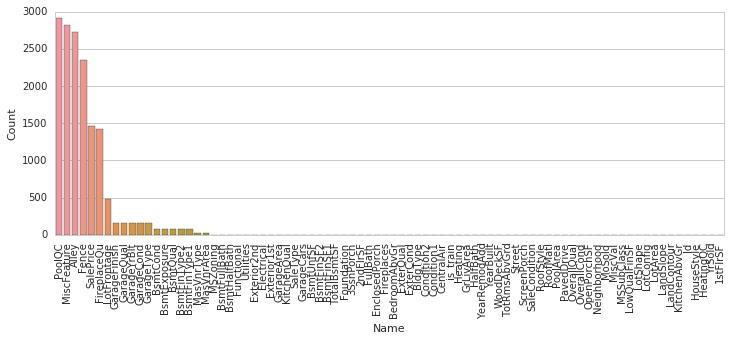

In [34]:
na = alldata.isnull().sum().sort_values(ascending=False)
print na[na > 0] #columns with many number of nulls
print ""
print na[na > 0].index.values

#visualising missing values
miss = na.to_frame()
miss.columns = ['Count']
miss.index.names = ['Name']
miss['Name'] = miss.index

sns.set(style="whitegrid", color_codes=True)
sns_plot = sns.barplot(x = "Name", y = "Count", data = miss)
plt.xticks(rotation = 90)   

plot = sns_plot.get_figure()

plot.savefig("../images/missing_values.pdf", bbox_inches='tight')   


# Analyze Numerical Features

In [11]:
numerical_features = [f for f in train.columns if train.dtypes[f] != 'object']
numerical_features.remove('Id')
print(numerical_features)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'is_train']


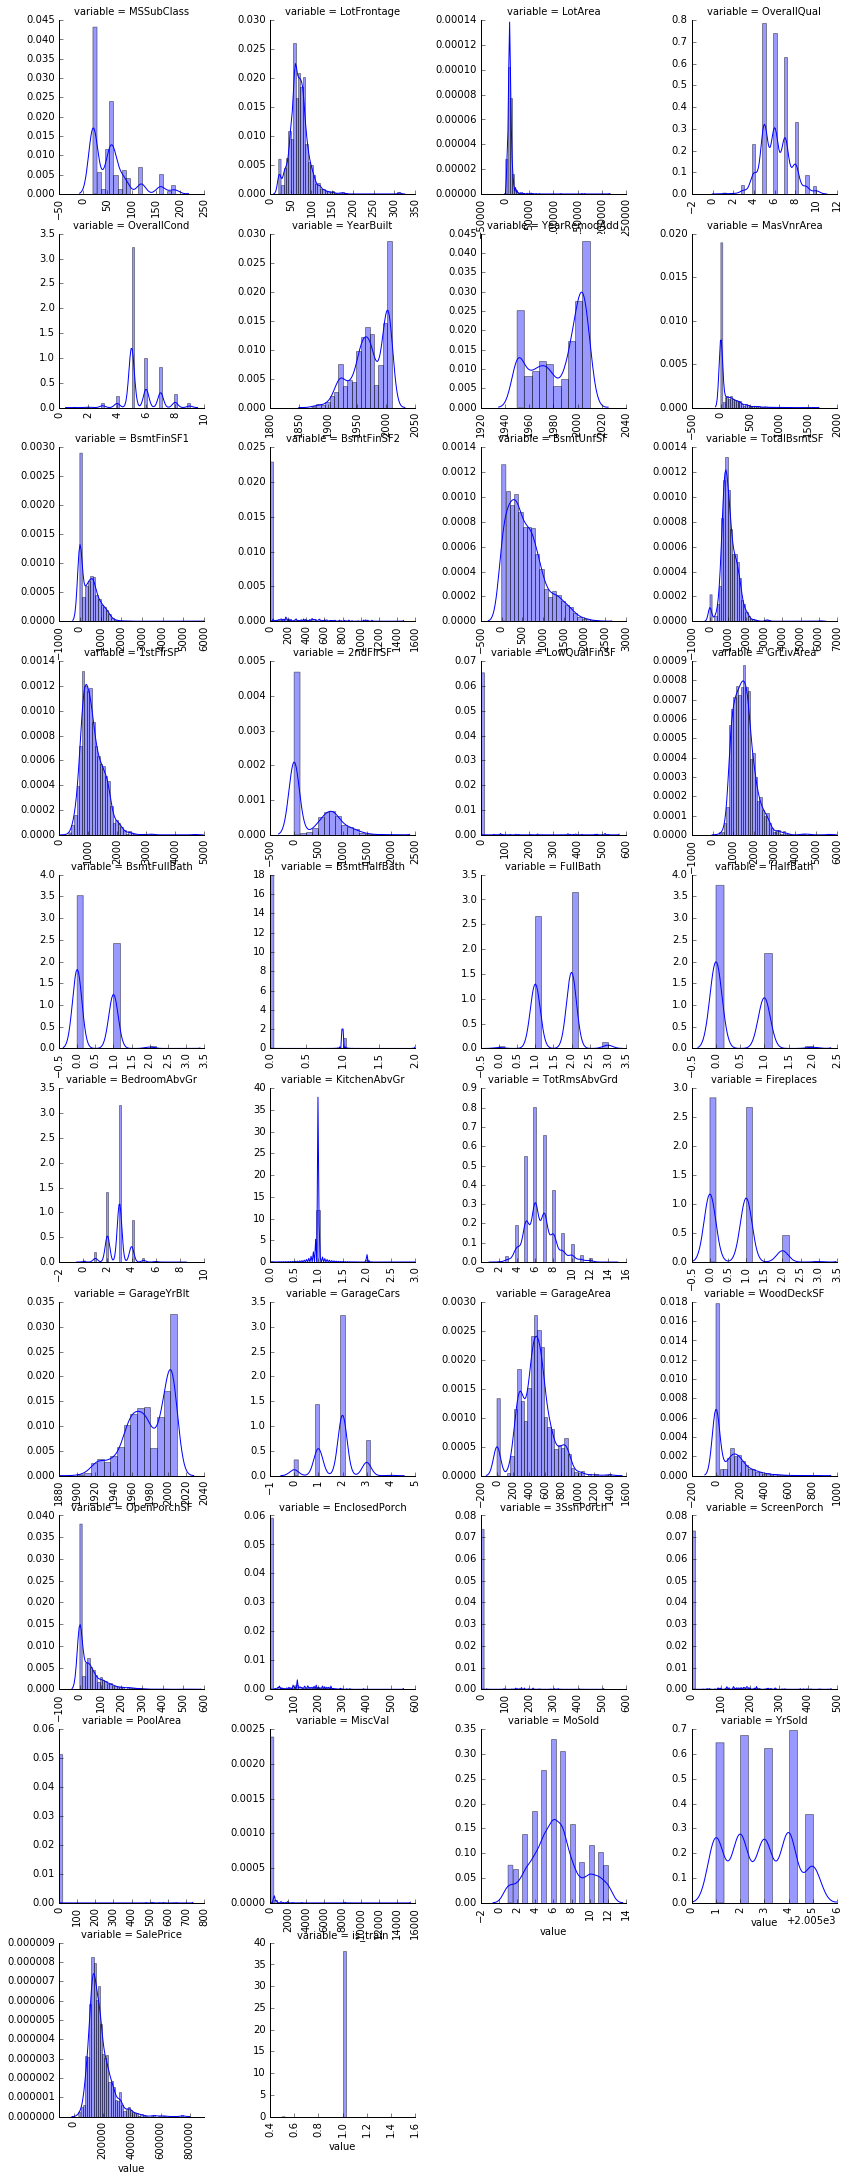

In [13]:
nd = pd.melt(train, value_vars = numerical_features)

plt.figure(figsize = (5,3))

plot = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    #end for
#end for     

plot.savefig("../images/num_features.pdf", bbox_inches='tight')


# Correlations with Sale Price

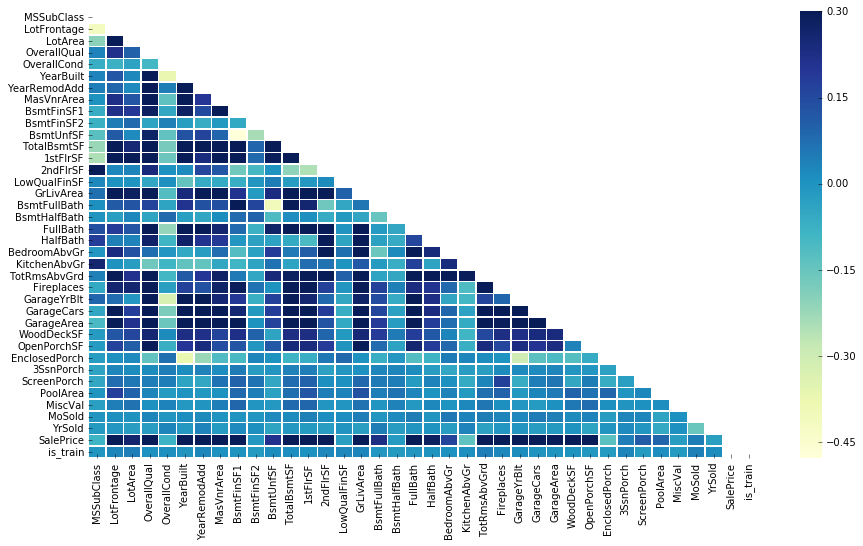

In [15]:
corr = alldata[numerical_features].corr()
    
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (15,8))

sns_plot = sns.heatmap(corr, cmap="YlGnBu", linewidths=.5,  mask=mask, vmax=.3)
plot = sns_plot.get_figure()

plot.savefig("../images/correlations.pdf")

In [17]:
 target_variable = "SalePrice"
    
#top 10 highly positively correlated variables with target
corr[target_variable].sort_values(ascending = False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [40]:
#bottom 5 highly negatively correlated variables with target
corr[target_variable].sort_values(ascending = False).tail(5)

YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
is_train              NaN
Name: SalePrice, dtype: float64

Pair-wise correlations of highly correlated variables with Sale Price

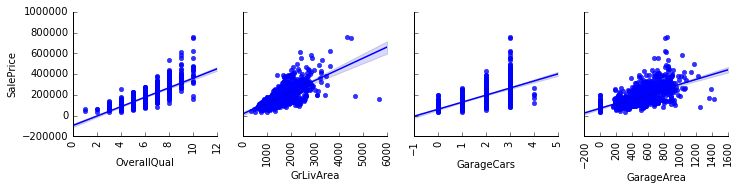

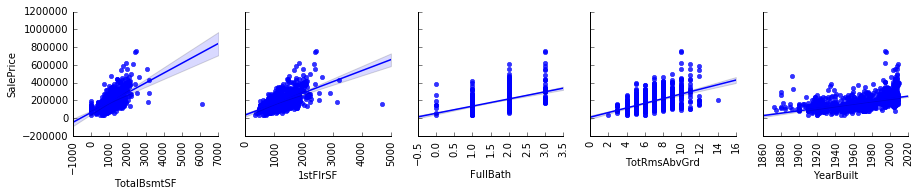

In [34]:
top_10 = corr[target_variable].sort_values(ascending = False).head(10).index
key_variables = []

for i in range(len(top_10)):
    key_variables.append(top_10[i])     
#end for

plt.figure(figsize = (5,4))

#turn off x-axis lables as they are overlapping                    
#plot.set(xticklabels=[])

plot = sns.pairplot(data = alldata[key_variables], 
                            x_vars = key_variables[1:5], 
                            y_vars = [target_variable],
                            kind="reg",                       
                            dropna=True)     
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    #end for
#end for

plot = sns.pairplot(data = alldata[key_variables], 
                            x_vars = key_variables[5:10], 
                            y_vars = [target_variable],
                            kind="reg",                       
                            dropna=True)    

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    #end for
#end for

plot.savefig("../images/pair_wise_correlations.pdf")